In [58]:
import pandas as pd
import numpy as np
df = pd.read_excel('microgrid.xlsx')
df.shape
df

,Irradiance,Temperature,Power Output
0,1161.020374,25,-5.405853
1,1162.020374,25,-4.932492
2,1163.020374,25,-4.428712
3,1164.020374,25,-3.854860
4,1165.020374,25,-3.162085
...,...,...,...
1829,1161.243512,25,89.849630
1830,1161.243634,25,89.868449
1831,1161.243756,25,89.883989
1832,1161.243878,25,89.892354


In [59]:
df.head

<bound method NDFrame.head of        Irradiance  Temperature  Power Output
0     1161.020374           25     -5.405853
1     1162.020374           25     -4.932492
2     1163.020374           25     -4.428712
3     1164.020374           25     -3.854860
4     1165.020374           25     -3.162085
...           ...          ...           ...
1829  1161.243512           25     89.849630
1830  1161.243634           25     89.868449
1831  1161.243756           25     89.883989
1832  1161.243878           25     89.892354
1833  1161.244000           25     89.892621

[1834 rows x 3 columns]>

In [60]:
df.isnull().sum()


Irradiance      0
Temperature     0
Power Output    0
dtype: int64

In [61]:
import random

In [62]:
df

,Irradiance,Temperature,Power Output
0,1161.020374,25,-5.405853
1,1162.020374,25,-4.932492
2,1163.020374,25,-4.428712
3,1164.020374,25,-3.854860
4,1165.020374,25,-3.162085
...,...,...,...
1829,1161.243512,25,89.849630
1830,1161.243634,25,89.868449
1831,1161.243756,25,89.883989
1832,1161.243878,25,89.892354


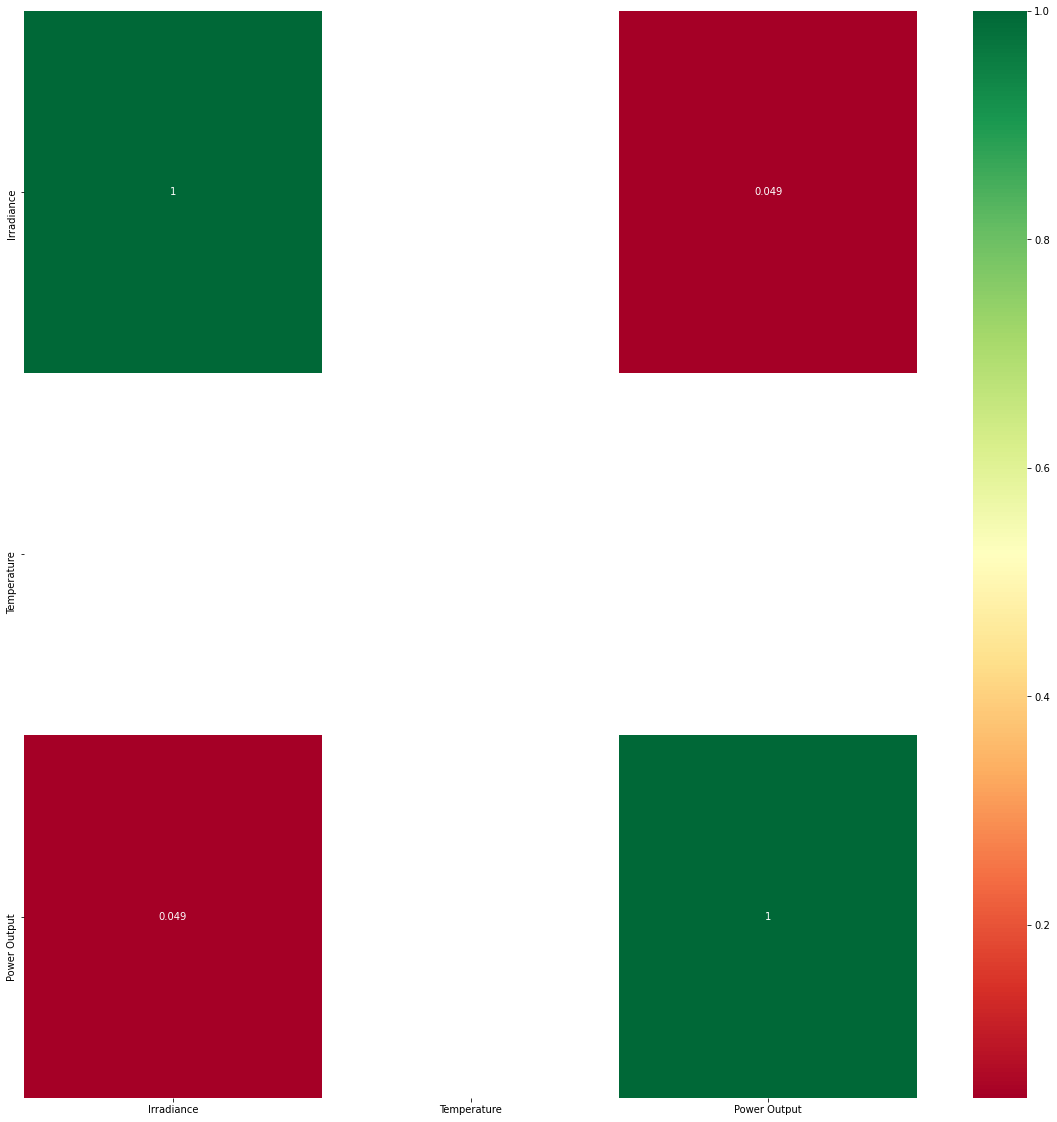

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Irradiance    1834 non-null   float64
 1   Temperature   1834 non-null   int64  
 2   Power Output  1834 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 43.1 KB


In [66]:
df.describe()

,Irradiance,Temperature,Power Output
count,1834.000000,1834.0,1834.000000
mean,1382.670587,25.0,88.850796
std,289.961835,0.0,10.612065
min,1161.020374,25.0,-5.405853
25%,1161.186203,25.0,88.981870
50%,1161.242109,25.0,89.407462
75%,1603.770374,25.0,89.756029
max,2062.020374,25.0,116.798086


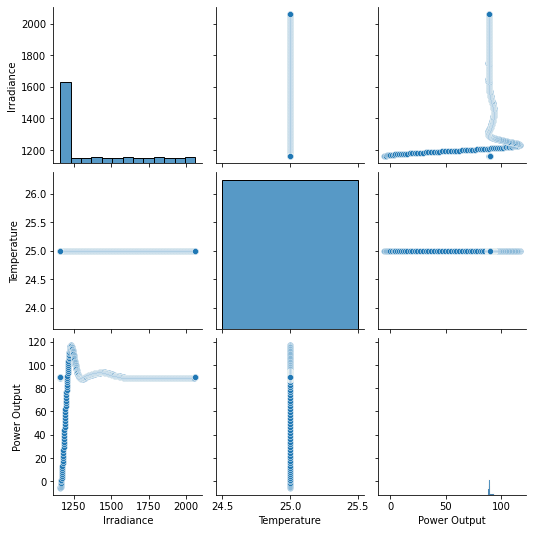

In [67]:
sns.pairplot(df)
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
X = df['Irradiance']
y = df['Power Output']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [75]:
# Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

C:\Users\Kapil\AppData\Local\Temp/ipykernel_17452/67130142.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]
C:\Users\Kapil\AppData\Local\Temp/ipykernel_17452/67130142.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred = lr.predict(X_test)

In [79]:
y_pred

array([88.3059055 , 88.30586685, 88.30593983, 88.3607334 , 88.3059444 ,
       90.02551576, 88.3058935 , 88.30607068, 88.30585293, 88.30592615,
       89.77363379, 88.30597465, 88.30606059, 88.30606467, 88.30587669,
       88.35876557, 89.02389138, 89.0534088 , 89.00224528, 88.30590334,
       89.30725859, 88.93730696, 89.1242506 , 88.30594608, 89.65753195,
       88.30604619, 89.02979487, 88.30587261, 89.39777867, 89.75592334,
       89.28758031, 88.30597729, 88.30586661, 88.65197192, 88.30592831,
       88.30592975, 88.30594704, 88.30602986, 88.41583258, 88.36663688,
       88.30587814, 88.30590502, 89.37219691, 89.23838462, 89.65359629,
       88.30606299, 88.30594224, 88.81530163, 89.21673851, 88.30586973,
       88.60671188, 89.99796617, 89.04160183, 88.30600321, 88.3060097 ,
       88.30604547, 88.45322131, 89.34661515, 89.25412724, 88.41780041,
       89.01602007, 89.40958564, 89.18525327, 88.30591175, 89.63391802,
       88.5161918 , 88.68542499, 88.30604235, 89.27380552, 88.30

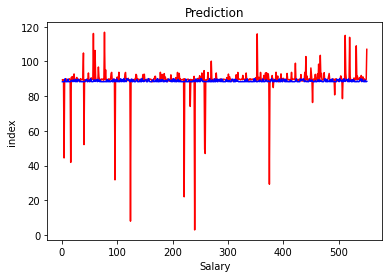

In [80]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

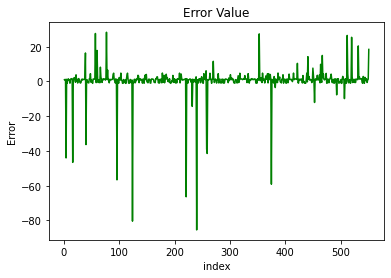

In [81]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [82]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [83]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)

In [84]:
rsq = r2_score(y_test,y_pred)

In [85]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 75.2956847061741
r square : -0.00033018003643814353


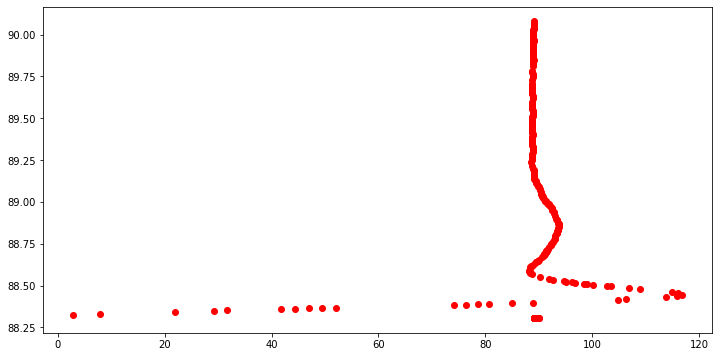

In [86]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='r',linestyle='-')
plt.show()

In [87]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 86.02094599499992
Coefficient of the line: [0.00196783]


In [112]:
X_train,X_test,y_train,y_test

(array([[1902.020374],
        [1786.020374],
        [1161.1342  ],
        ...,
        [1240.020374],
        [1953.020374],
        [1161.208742]]),
 array([[1161.158234],
        [1161.138592],
        [1161.17568 ],
        [1189.020374],
        [1161.177998],
        [2035.020374],
        [1161.152134],
        [1161.24217 ],
        [1161.131516],
        [1161.168726],
        [1907.020374],
        [1161.19337 ],
        [1161.237046],
        [1161.23912 ],
        [1161.143594],
        [1188.020374],
        [1526.020374],
        [1541.020374],
        [1515.020374],
        [1161.157136],
        [1670.020374],
        [1482.020374],
        [1577.020374],
        [1161.178852],
        [1848.020374],
        [1161.229726],
        [1529.020374],
        [1161.14152 ],
        [1716.020374],
        [1898.020374],
        [1660.020374],
        [1161.194712],
        [1161.13847 ],
        [1337.020374],
        [1161.169824],
        [1161.170556],
        [1161.17934

In [113]:
from sklearn.cluster import KMeans

In [118]:
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop('Temperature',axis=1)

In [119]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [120]:
kmeans.cluster_centers_

array([[1776.020374  ,   89.16756047],
       [1203.93194436,   88.70685847]])

In [121]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[1 1 1 ... 1 1 1]
1834


In [126]:
print(kmeans.labels_)
print(y_test)

[1 1 1 ... 1 1 1]
1130     89.341940
969      89.100308
1273     89.502267
28       44.356216
1292     89.559973
           ...    
1730     89.836295
490      88.688890
1112     89.182446
1569     89.667655
91      106.951564
Name: Power Output, Length: 551, dtype: float64


In [131]:
df2 =df.drop('Temperature',axis=1)
df2
print(kmeans.predict(df2))

[1 1 1 ... 1 1 1]


C:\Users\Kapil\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kapil\AppData\Roaming\Python\Python39\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


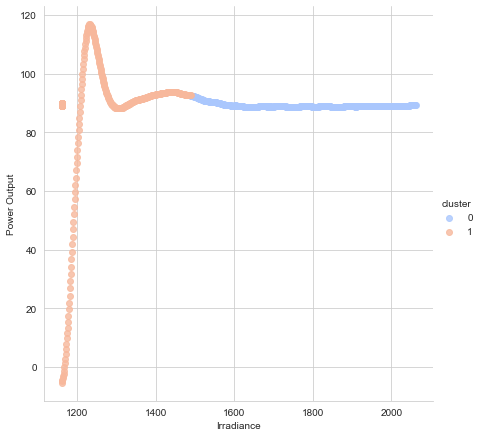

In [132]:
# plot the data 
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Irradiance','Power Output',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

[[1170.24191338   88.15273557]
 [1685.520374     88.90177137]
 [1429.520374     91.64800092]
 [1937.520374     88.90557593]]
{0: 1071, 1: 254, 2: 258, 3: 251}


C:\Users\Kapil\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kapil\AppData\Roaming\Python\Python39\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


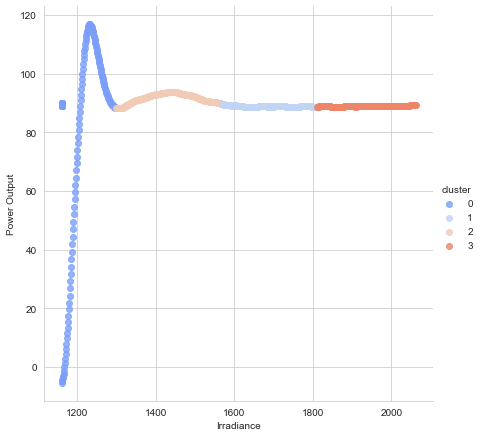

In [135]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df2)
kmeans_4.fit(df2)
print(kmeans_4.cluster_centers_)	
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))
# plot the data 
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('Irradiance','Power Output',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)